<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# **CASE**: Avaliação de aplicativos de comida do Google Play

# Scraping

In [ ]:
# Google play scraper: https://github.com/JoMingyu/google-play-scraper
!pip install google_play_scraper

## Select apps_ids

Vamos selecionar apps nacionais de comida.

In [ ]:
apps_ids = ['br.com.brainweb.ifood',
            'com.mcdo.mcdonalds',
            'habibs.alphacode.com.br',
            'com.ubercab.eats',
            'burgerking.com.br.appandroid',
            'com.grability.rappi',
            'com.xiaojukeji.didi.brazil.customer',
            'com.vanuatu.aiqfome',
            ]


## Get app info (app_id)

In [ ]:
from tqdm import tqdm
from google_play_scraper import Sort, reviews, app
import pandas as pd

app_infos = []

for ap in tqdm(apps_ids):
    info = app(ap, lang='en', country='us')
    del info['comments']
    app_infos.append(info)

app_infos_df = pd.DataFrame(app_infos)
app_infos_df.head()

100%|██████████| 8/8 [00:01<00:00,  4.74it/s]


,title,description,descriptionHTML,summary,installs,minInstalls,realInstalls,score,ratings,reviews,...,videoImage,contentRating,contentRatingDescription,adSupported,containsAds,released,updated,version,appId,url
0,iFood comida e mercado em casa,"Buy in markets, restaurants, pharmacies and pe...","Buy in markets, restaurants, pharmacies and pe...","Order food delivery, market, drinks, pharmacy ...","100,000,000+",100000000,106999958,4.639570,12659810,2615,...,None,Everyone,None,False,False,"Apr 25, 2012",1697487084,None,br.com.brainweb.ifood,https://play.google.com/store/apps/details?id=...
1,McDonald's Offers and Delivery,Enter the new McDonald's App and get exclusive...,Enter the new McDonald&#39;s App and get exclu...,"Enjoy esclusive discounts, promotions and coup...","50,000,000+",50000000,68991582,4.579838,1285924,3202,...,None,Everyone,None,True,True,"Mar 27, 2017",1696842000,3.34.0,com.mcdo.mcdonalds,https://play.google.com/store/apps/details?id=...
2,Habib's,Our menu is filled with Arab delicacies prepar...,Our menu is filled with Arab delicacies prepar...,Want to end your hunger? Come to the Habib's App!,"5,000,000+",5000000,8411175,3.852941,254013,18,...,None,Everyone,None,False,False,None,1696336521,3.10.8,habibs.alphacode.com.br,https://play.google.com/store/apps/details?id=...
3,Uber Eats: Food Delivery,Get food delivery to your doorstep from thousa...,Get food delivery to your doorstep from thousa...,"Food & Grocery Delivery App. Order Pizza, Sush...","100,000,000+",100000000,223767911,4.375641,5242451,312840,...,None,Everyone,None,True,True,"Feb 29, 2016",1697478920,None,com.ubercab.eats,https://play.google.com/store/apps/details?id=...
4,Burger King Brasil,Do you already know the BK® rewards program? C...,Do you already know the BK® rewards program? C...,Get exclusive coupons with the official applic...,"10,000,000+",10000000,22950032,4.555555,400280,6,...,None,Everyone,None,False,False,None,1697057297,4.0.11,burgerking.com.br.appandroid,https://play.google.com/store/apps/details?id=...


## Scraping App Reviews



In [ ]:
app_reviews = []

for ap in tqdm(apps_ids):
    for score in list(range(1, 6)):
        for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
            rvs, _ = reviews(
                ap,
                lang='pt',
                country='br',
                sort=sort_order,
            )
            for r in rvs:
                r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
                r['appId'] = ap
            app_reviews.extend(rvs)

100%|██████████| 8/8 [00:10<00:00,  1.36s/it]


## Saving reviews in a DataFrame

In [ ]:
app_reviews_df = pd.DataFrame(app_reviews)

In [ ]:
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,5bb50b12-d3c0-4410-a7c7-d58931eecefc,Reinaldo Castro,https://play-lh.googleusercontent.com/a-/ALV-U...,"Uso bastante pra fazer mercado, mas, nas últim...",2,214,9.227.0,2023-10-10 21:03:49,None,NaT,9.227.0,most_relevant,br.com.brainweb.ifood
1,23438b56-fc66-49a5-bab8-b340b2ba20ac,Karina F S (Akarinaluz),https://play-lh.googleusercontent.com/a-/ALV-U...,Fiz uma compra que tinha desconto e não entrou...,1,489,9.226.0,2023-10-01 10:53:46,None,NaT,9.226.0,most_relevant,br.com.brainweb.ifood
2,04326939-0402-4fba-8fa9-c804c6990638,Luiz Felipe Tavares Cancian,https://play-lh.googleusercontent.com/a-/ALV-U...,"Aplicativo não funciona mais, os pedidos são f...",1,238,9.226.0,2023-09-29 23:06:49,None,NaT,9.226.0,most_relevant,br.com.brainweb.ifood
3,eb08efe5-184d-46aa-b9a1-21b0315961a1,Rodrigo Jordão,https://play-lh.googleusercontent.com/a-/ALV-U...,"Quando o carrinho de mercado está muito cheio,...",1,423,9.228.0,2023-10-14 21:18:28,None,NaT,9.228.0,most_relevant,br.com.brainweb.ifood
4,34a866ed-31db-4329-bbbb-3e9d3d806447,César de Lucca,https://play-lh.googleusercontent.com/a-/ALV-U...,O app é muito bom! O problema é o atendimento....,5,53,9.226.0,2023-09-30 03:13:12,None,NaT,9.226.0,most_relevant,br.com.brainweb.ifood


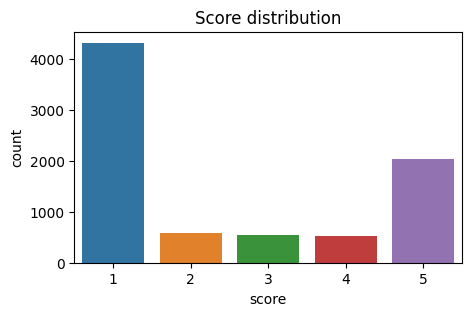

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,3))

sns.countplot(x='score',data=app_reviews_df)
plt.title('Score distribution')
plt.show()

#### Q1. Quantos reviews foram coletados de cada appId?

In [ ]:
# seu código
app_reviews_df.shape

(8000, 13)

In [ ]:
app_reviews_df.to_csv('app_reviews_df.csv',index=None)

# **Importante: WITHOUT SCRAPING**

As informações que você coletou mudam a toda hora... afinal, aparecem novas revisões a cada dia. Então vamos empregar um dataset comum a todos.

In [ ]:
df = pd.read_csv("https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/data/app_reviews_df.csv")
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,5bb50b12-d3c0-4410-a7c7-d58931eecefc,Reinaldo Castro,https://play-lh.googleusercontent.com/a-/ALV-U...,"Uso bastante pra fazer mercado, mas, nas últim...",2,213,9.227.0,2023-10-10 21:03:49,NaN,NaN,9.227.0,most_relevant,br.com.brainweb.ifood
1,23438b56-fc66-49a5-bab8-b340b2ba20ac,Karina F S (Akarinaluz),https://play-lh.googleusercontent.com/a-/ALV-U...,Fiz uma compra que tinha desconto e não entrou...,1,487,9.226.0,2023-10-01 10:53:46,NaN,NaN,9.226.0,most_relevant,br.com.brainweb.ifood
2,04326939-0402-4fba-8fa9-c804c6990638,Luiz Felipe Tavares Cancian,https://play-lh.googleusercontent.com/a-/ALV-U...,"Aplicativo não funciona mais, os pedidos são f...",1,237,9.226.0,2023-09-29 23:06:49,NaN,NaN,9.226.0,most_relevant,br.com.brainweb.ifood
3,eb08efe5-184d-46aa-b9a1-21b0315961a1,Rodrigo Jordão,https://play-lh.googleusercontent.com/a-/ALV-U...,"Quando o carrinho de mercado está muito cheio,...",1,423,9.228.0,2023-10-14 21:18:28,NaN,NaN,9.228.0,most_relevant,br.com.brainweb.ifood
4,34a866ed-31db-4329-bbbb-3e9d3d806447,César de Lucca,https://play-lh.googleusercontent.com/a-/ALV-U...,O app é muito bom! O problema é o atendimento....,5,53,9.226.0,2023-09-30 03:13:12,NaN,NaN,9.226.0,most_relevant,br.com.brainweb.ifood


#### Q2. Quais scores estão mais presentes na base de dados?

In [ ]:
# Seu código
scores = df['score'].value_counts()
scores

1    4295
5    2050
2     590
3     545
4     520
Name: score, dtype: int64

## Sentiment from score

Crie uma atributo `sentiment` em `df` atribuindo os seguintes sentimentos a cada review:

<br>

$-1$, negativo se `score` $\le 2$,

$0$, neutro se `score` $= 3$,

$+1$, positivo se `score` $\gt 3$

In [ ]:
# Seu código
df['sentiment'] = df['score'].apply(lambda x: -1 if x <= 2 else 0 if x == 3 else 1)
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId,sentiment
0,5bb50b12-d3c0-4410-a7c7-d58931eecefc,Reinaldo Castro,https://play-lh.googleusercontent.com/a-/ALV-U...,"Uso bastante pra fazer mercado, mas, nas últim...",2,213,9.227.0,2023-10-10 21:03:49,NaN,NaN,9.227.0,most_relevant,br.com.brainweb.ifood,-1
1,23438b56-fc66-49a5-bab8-b340b2ba20ac,Karina F S (Akarinaluz),https://play-lh.googleusercontent.com/a-/ALV-U...,Fiz uma compra que tinha desconto e não entrou...,1,487,9.226.0,2023-10-01 10:53:46,NaN,NaN,9.226.0,most_relevant,br.com.brainweb.ifood,-1
2,04326939-0402-4fba-8fa9-c804c6990638,Luiz Felipe Tavares Cancian,https://play-lh.googleusercontent.com/a-/ALV-U...,"Aplicativo não funciona mais, os pedidos são f...",1,237,9.226.0,2023-09-29 23:06:49,NaN,NaN,9.226.0,most_relevant,br.com.brainweb.ifood,-1
3,eb08efe5-184d-46aa-b9a1-21b0315961a1,Rodrigo Jordão,https://play-lh.googleusercontent.com/a-/ALV-U...,"Quando o carrinho de mercado está muito cheio,...",1,423,9.228.0,2023-10-14 21:18:28,NaN,NaN,9.228.0,most_relevant,br.com.brainweb.ifood,-1
4,34a866ed-31db-4329-bbbb-3e9d3d806447,César de Lucca,https://play-lh.googleusercontent.com/a-/ALV-U...,O app é muito bom! O problema é o atendimento....,5,53,9.226.0,2023-09-30 03:13:12,NaN,NaN,9.226.0,most_relevant,br.com.brainweb.ifood,1


## Load `nltk`

In [ ]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#### Q3. Acesse a lista de `stopwords` em português (`stopwords.words('portuguese')`). Qual a posição da `stopword` "não"?

In [ ]:
# Seu código
stopwords_pt = stopwords.words('portuguese')
nao = stopwords_pt.index('não')
nao

120

## Use a seguinte função de pré-processamento de textos

In [ ]:
def text_preprocessing(s):
    # Always lower
    s = s.lower()
    # Remove @name
    s = re.sub(r'(@.*?)[\s]', ' ', s)
    # Isolate and remove punctuations except '?'
    s = re.sub(r'([\'\"\.\!\?\\/\,])', r' \1 ', s)
    s = re.sub(r'[^\w\s\?]', ' ', s)
    # Remove some special characters
    s = re.sub(r'([\;\:\|•«\n])', ' ', s)
    # Remove trailing whitespace
    s = re.sub(r'\s+', ' ', s).strip()
    # Remove stopwords except 'não' e 'nem'
    s = " ".join([word for word in s.split()
                  if word not in stopwords.words('portuguese')
                  or word in ['não','nem']])

    return s


Crie uma lista `X_preprocessed` em que cada elemento é texto de revisão (`df.content`) pré-processado pela função acima.

<small>
nota: talvez pudéssemos empregar o preprocessor na função de tokenização, ou mesmo o stop_words da função, mas aqui vamos por partes...

In [ ]:
# Seu código
X_preprocessed = df.apply(lambda row: text_preprocessing(row['content']), axis=1)

In [ ]:
#@markdown Check if True
X_preprocessed[7000][0:100] == 'última atualização fica apresentando erro conexão parece internet caiu sendo verifiquei tá tudo ok a'

True

## TF-IDF

Empregue o estimador de TF-IDF de textos do `scikit-learn` com os seguintes parâmetros,

```
tf_idf = TfidfVectorizer(ngram_range=(1, 3),
                         binary=True,
                         smooth_idf=False,
                         ...
```

e o máximo tamanho de representação dos texto com 4096, para criar representações TF-IDF dos textos pré-processados de `X_preprocessed`.

**Lembre-se**, um estimador possui métodos `fit()` e `transform()`...







In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(ngram_range=(1, 3), binary=True, smooth_idf=False, max_features=4096)

tf_idf.fit(X_preprocessed)

X_tfidf = tf_idf.transform(X_preprocessed)
print(X_tfidf.toarray()[ X_tfidf.toarray() != 0 ].sum())


32688.356101956542


In [ ]:
#@markdown Check if True
X_tfidf.toarray()[ X_tfidf.toarray() != 0 ].sum() == 32688.356101956542

True

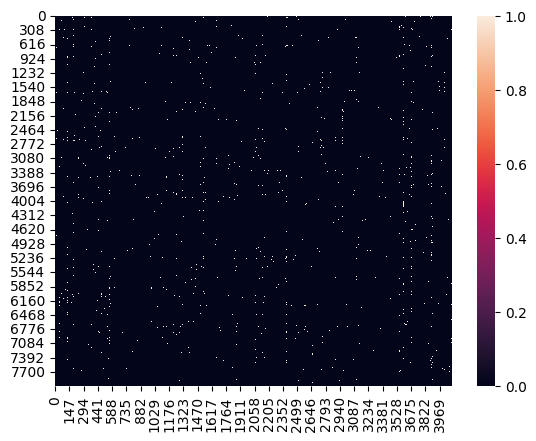

In [ ]:
X0 = X_tfidf.toarray() != 0
sns.heatmap(X0)
plt.show()

## KNeighborsClassifier

Empregue os valores TF-IDF obtidos dos textos de review acima, `X_tfidf`, para fazer uma classificação do sentimento das revisões. **Empregue o modelo de K-vizinhos mais próximos, com `k=8` e função distância cosseno.**

Empregue `random_state=1`, 0.3 de dados de teste estratificados.

In [ ]:
# Seu código
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_treino, X_teste, y_treino, y_teste = train_test_split(
    X_tfidf, df.sentiment, test_size=0.3, random_state=1, stratify=df.sentiment
)

knn = KNeighborsClassifier(n_neighbors=8, metric="cosine")

knn.fit(X_treino, y_treino)

y_pred = knn.predict(X_teste)

print(classification_report(y_teste, knn.predict(X_teste)))

              precision    recall  f1-score   support

          -1       0.86      0.91      0.89      1465
           0       0.52      0.27      0.35       164
           1       0.82      0.83      0.82       771

    accuracy                           0.84      2400
   macro avg       0.74      0.67      0.69      2400
weighted avg       0.83      0.84      0.83      2400



#### Q4. Qual a acuracidade obtida do modelo de K-vizinhos mais próximos?







In [ ]:
from sklearn.metrics import accuracy_score

acuracia = accuracy_score(y_teste, y_pred)

print(f'Acuracia: {acuracia:.2f}')

Acuracia: 0.84


#### Q5. Classifique quanto ao sentimento as expressões 'Aplicativo Lixo' e 'Maravilha!'. Ambas deram o resultado esperado?

In [ ]:
# Seu código

## RandomForestClassifier

Altere o código do modelo anterior para empregar uma Floresta de Árvores Aleatórias não esquecendo de empregar `random_state=1`.

In [ ]:
# Seu código

#### Q6. Qual a acuracidade obtida do modelo de Floresta?







#### Q7. Classifique quanto ao sentimento as expressões 'Aplicativo Lixo' e 'Maravilha!' com o novo modelo. Ambas deram o resultado esperado?

In [ ]:
# Seu código

## RandomForestClassifier

Altere o código do modelo Floresta de Árvores Aleatórias anterior agora para classificar o score dos reviews.

In [ ]:
# Seu código

#### Q8. Qual a acuracidade obtida na classificação do score dos reviews?